# INTERFERENCIA

Usando la ecuacion **d sen(θ) = m λ** se calculan los angulos en los cuales se encuentran los minimos de interferencia, es decir una ubicacion en el eje y en el que la intensidad luminica es minima.

## USANDO EL METODO DE LA BISECCIÓN

La solución aproximada es: 0.6435011088848117
Se realizaron 28 iteraciones
╒═════════════╤══════════╤══════════╤══════════╤══════════════╤════════════════════╕
│   iteracion │        a │      x_r │        b │       f(x_r) │   Error Relativo % │
╞═════════════╪══════════╪══════════╪══════════╪══════════════╪════════════════════╡
│           0 │        0 │      0.8 │      1.6 │      0.58678 │                100 │
├─────────────┼──────────┼──────────┼──────────┼──────────────┼────────────────────┤
│           1 │        0 │      0.4 │      0.8 │     -1.05291 │                100 │
├─────────────┼──────────┼──────────┼──────────┼──────────────┼────────────────────┤
│           2 │      0.4 │      0.6 │      0.8 │    -0.176788 │            33.3333 │
├─────────────┼──────────┼──────────┼──────────┼──────────────┼────────────────────┤
│           3 │      0.6 │      0.7 │      0.8 │     0.221088 │            14.2857 │
├─────────────┼──────────┼──────────┼──────────┼──────────────┼────────────

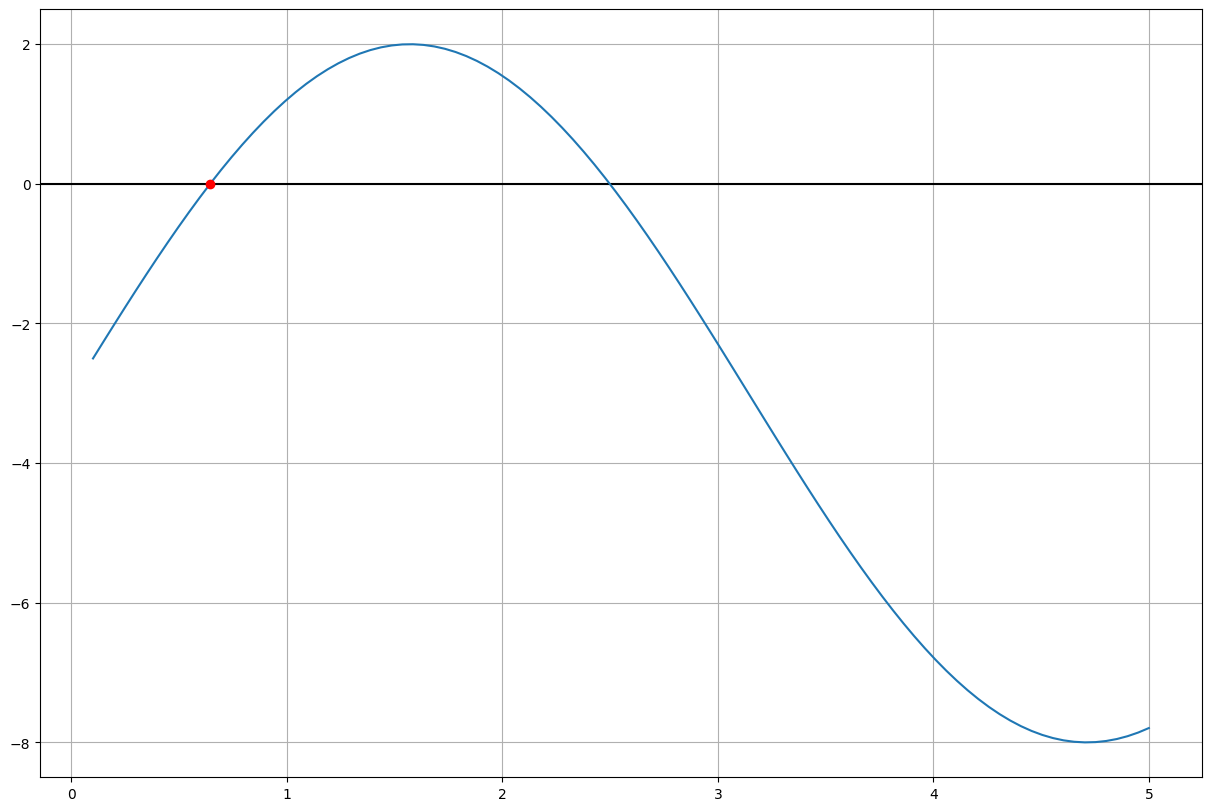

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, sin
from tabulate import tabulate

def biseccion(funcion, a, b, tolerancia, max_iteraciones):
    iteraciones = 0
    x_rprev= 0
    resultados = []
    
    while iteraciones < max_iteraciones:
        x_r = (a + b) / 2
        fx_r = funcion.subs('x', x_r)

        if x_rprev !=0:
            error_relativo = abs((x_r - x_rprev) / x_r)*100
        else:
            error_relativo = 100
        
        resultados.append([iteraciones, a, x_r, b, fx_r, error_relativo])
        
        if error_relativo < tolerancia :
            return x_r, iteraciones + 1, resultados
        
        if fx_r * funcion.subs('x', a) < 0:
            b = x_r
        else:
            a = x_r
        
        x_rprev = x_r
        iteraciones += 1
    
    return None, max_iteraciones, resultados


x = symbols('x')
funcion = (5* sin(x)) - 3# el valor de seno esta dado en radianes

a = 0  # Valor inicial de a
b = 1.6 # Valor inicial de b
tolerancia = 1e-6
max_iteraciones = 100

solucion, iteraciones_realizadas, resultados = biseccion(funcion, a, b, tolerancia, max_iteraciones)

if solucion is not None:
    print(f"La solución aproximada es: {solucion}")
    print(f"Se realizaron {iteraciones_realizadas} iteraciones")
    
    encabezados = ['iteracion',"a", "x_r", "b", "f(x_r)", "Error Relativo %"]
    tabla = tabulate(resultados, headers=encabezados, tablefmt="fancy_grid", numalign="right")
    print(tabla)
else:
    print("El método no convergió en el número máximo de iteraciones")

x_1 = np.linspace(0.1, 5, 100)
xr = solucion

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = fig.add_gridspec(1, 1)
plt.axhline(y=0, xmin=-10, xmax=10, color="k")
plt.plot(x_1, [funcion.subs('x', i).evalf() for i in x_1])
plt.plot(xr, 0, marker="o", color="red")
plt.grid()
plt.show()

## USANDO EL METODO DEL PUNTO FIJO

In [ ]:
from sympy import symbols, sin, E, ln
from tabulate import tabulate

def punto_fijo(funcion, gx, x_inicial, tolerancia, max_iteraciones):
    x = x_inicial
    iteraciones = 0
    x_rprev = 0 
    resultados = []
    
    while iteraciones < max_iteraciones:
        xr = gx.subs('x', x)
        x = xr
        iteraciones += 1

        if x_rprev !=0:
            error = abs((xr - x_rprev) / xr)*100
        else:
            error = 100

        resultados.append([iteraciones, xr, funcion.subs('x', xr), error])

        if error < tolerancia:
            return xr, iteraciones, resultados

        x_rprev = xr

        if iteraciones > max_iteraciones:
            break

    return None, iteraciones, resultados


x = symbols('x')
funcion = (5* sin(x)) - 3#
gx = x+(5* sin(x)) - 3#

x_inicial = 1  # Valor inicial
tolerancia = 1e-6
max_iteraciones = 10

solucion, iteraciones_realizadas, resultados = punto_fijo(funcion, gx, x_inicial, tolerancia, max_iteraciones)

if solucion is not None:
    print(f"La solución aproximada es: {solucion}")
    print(f"Se realizaron {iteraciones_realizadas} iteraciones")
    
    encabezados = ['iteracion', "x", "f(x)", "Error"]
    tabla = tabulate(resultados, headers=encabezados, tablefmt="fancy_grid", numalign="right")
    print(tabla)
else:
    print("El método no convergió en el número máximo de iteraciones")

## USANDO LA FALSA POSICIÓN 

La solución aproximada es: 0.643501109005705
Se realizaron 12 iteraciones
╒═════════════╤═════╤══════════╤══════════╤═════════════╤════════════════════╕
│   iteracion │   a │      x_r │        b │      f(x_r) │   Error Relativo % │
╞═════════════╪═════╪══════════╪══════════╪═════════════╪════════════════════╡
│           0 │   0 │  0.96041 │      1.6 │     1.09713 │                100 │
├─────────────┼─────┼──────────┼──────────┼─────────────┼────────────────────┤
│           1 │   0 │ 0.703231 │  0.96041 │    0.233426 │            36.5711 │
├─────────────┼─────┼──────────┼──────────┼─────────────┼────────────────────┤
│           2 │   0 │ 0.652463 │ 0.703231 │   0.0357277 │            7.78087 │
├─────────────┼─────┼──────────┼──────────┼─────────────┼────────────────────┤
│           3 │   0 │ 0.644784 │ 0.652463 │  0.00513064 │            1.19092 │
├─────────────┼─────┼──────────┼──────────┼─────────────┼────────────────────┤
│           4 │   0 │ 0.643684 │ 0.644784 │ 0.000729717 │

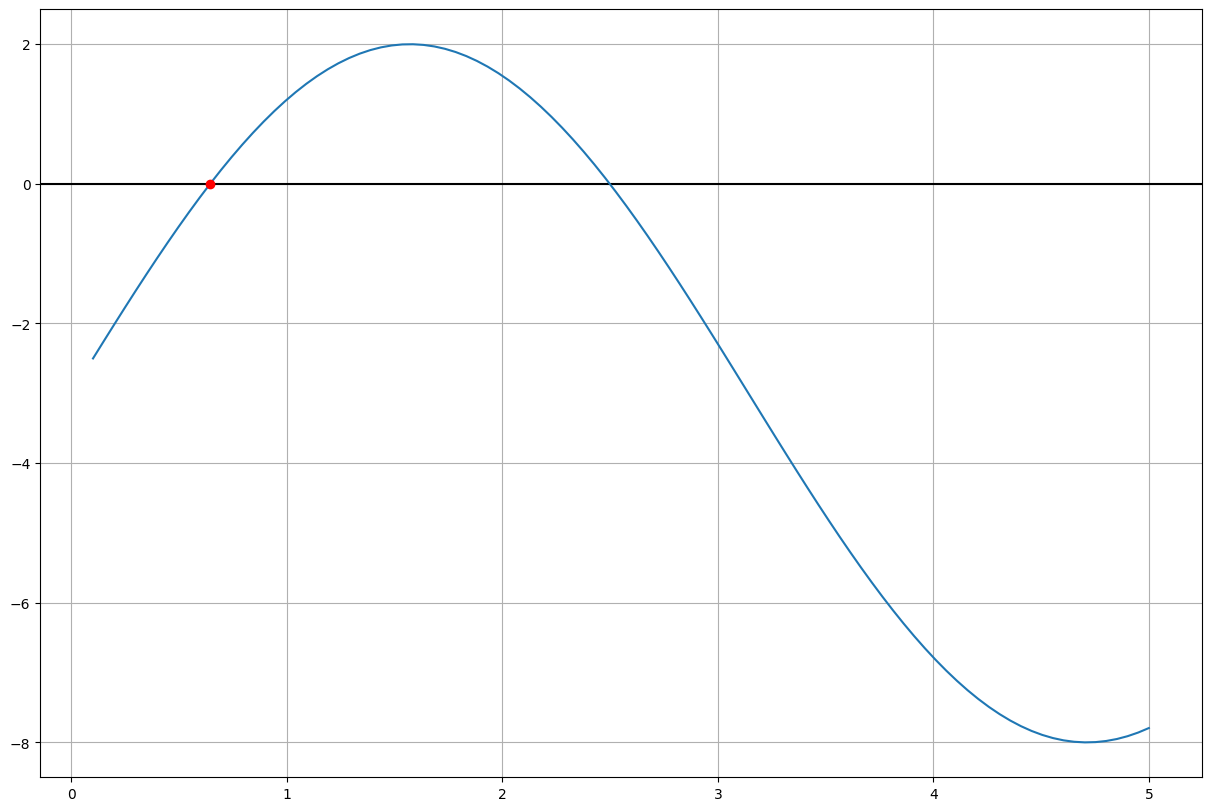

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, sin
from tabulate import tabulate

def falsa_posicion(funcion, a, b, tolerancia, max_iteraciones):
    iteraciones = 0
    x_rprev= 0
    resultados = []
    
    while iteraciones < max_iteraciones:
        fa = funcion.subs('x', a)
        fb = funcion.subs('x', b)
        x_r = (a * fb - b * fa) / (fb - fa)
        fx_r = funcion.subs('x', x_r)

        if x_rprev !=0:
            error_relativo = abs((x_r - x_rprev) / x_r)*100
        else:
            error_relativo = 100
        
        resultados.append([iteraciones, a, x_r, b, fx_r, error_relativo])
        
        if error_relativo < tolerancia :
            return x_r, iteraciones + 1, resultados
        
        if fx_r * funcion.subs('x', a) < 0:
            b = x_r
        else:
            a = x_r
        
        x_rprev = x_r
        iteraciones += 1
    
    return None, max_iteraciones, resultados


x = symbols('x')
funcion = (5* sin(x)) - 3# el valor de seno esta dado en radianes

a = 0  # Valor inicial de a
b = 1.6 # Valor inicial de b
tolerancia = 1e-6
max_iteraciones = 100

solucion, iteraciones_realizadas, resultados = falsa_posicion(funcion, a, b, tolerancia, max_iteraciones)

if solucion is not None:
    print(f"La solución aproximada es: {solucion}")
    print(f"Se realizaron {iteraciones_realizadas} iteraciones")
    
    encabezados = ['iteracion',"a", "x_r", "b", "f(x_r)", "Error Relativo %"]
    tabla = tabulate(resultados, headers=encabezados, tablefmt="fancy_grid", numalign="right")
    print(tabla)
else:
    print("El método no convergió en el número máximo de iteraciones")

x_1 = np.linspace(0.1, 5, 100)
xr = solucion

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = fig.add_gridspec(1, 1)
plt.axhline(y=0, xmin=-10, xmax=10, color="k")
plt.plot(x_1, [funcion.subs('x', i).evalf() for i in x_1])
plt.plot(xr, 0, marker="o", color="red")
plt.grid()
plt.show()